Calibration values: a=-4.441002452060697, b=22.556228308181506


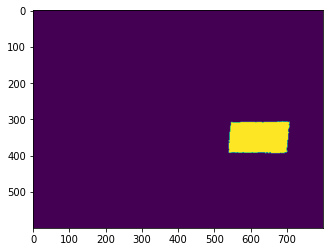

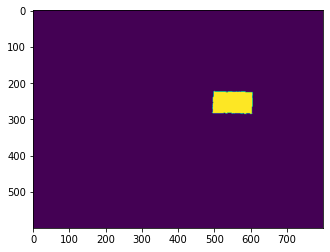

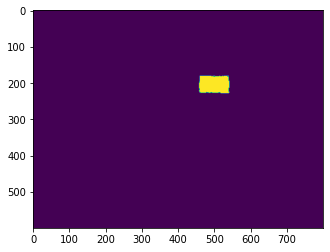

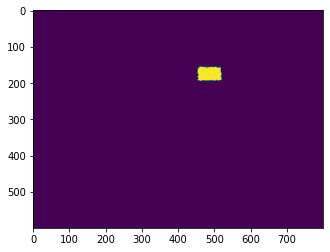

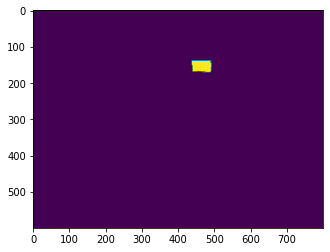

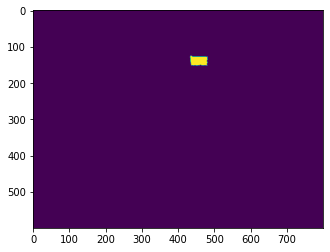

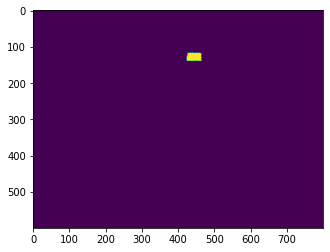

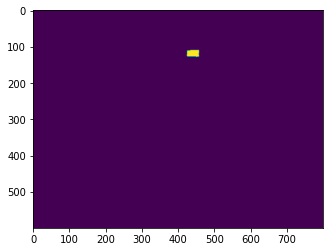

In [10]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_flag_area(image_path):
    img = cv2.imread(image_path)
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    combined_mask = cv2.inRange(hsv_img, lower_red, upper_red)

    contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return 0
    
    largest_contour = max(contours, key=cv2.contourArea)
    largest_contour_mask = np.zeros_like(combined_mask)
    cv2.drawContours(largest_contour_mask, [largest_contour], -1, 255, thickness=cv2.FILLED)
    flag_area = cv2.contourArea(largest_contour)
    plt.figure()
    plt.imshow(largest_contour_mask)
    return np.sqrt(flag_area)

area_2ft = calculate_flag_area('2ft.png')
area_3ft = calculate_flag_area('3ft.png')
area_4ft = calculate_flag_area('4ft.png')
area_5ft = calculate_flag_area('5ft.png')
area_6ft = calculate_flag_area('6ft.png')
area_7ft = calculate_flag_area('7ft.png')
area_8ft = calculate_flag_area('8ft.png')
area_9ft = calculate_flag_area('9ft.png')

vals = np.array([[area_2ft,2],[area_3ft,3],[area_4ft,4],[area_5ft,5],[area_6ft,6],[area_7ft,7],[area_8ft,8],[area_9ft, 9]])
a, b = np.polyfit(np.log(vals[:,0]), vals[:,1], 1)

print(f'Calibration values: a={a}, b={b}')

def predict_distance(img, a, b):
    val = calculate_flag_area(img)
    predicted_distance = a*np.log(val) + b
    return predicted_distance    

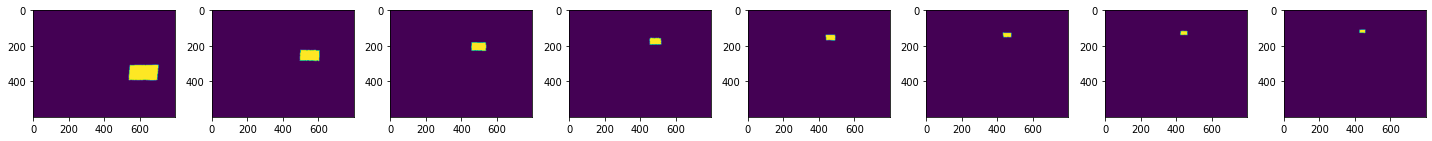

In [11]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def calculate_flag_area(image_path, ax):
    img = cv2.imread(image_path)
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    combined_mask = cv2.inRange(hsv_img, lower_red, upper_red)

    contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return 0
    
    largest_contour = max(contours, key=cv2.contourArea)
    largest_contour_mask = np.zeros_like(combined_mask)
    cv2.drawContours(largest_contour_mask, [largest_contour], -1, 255, thickness=cv2.FILLED)
    flag_area = cv2.contourArea(largest_contour)

    ax.imshow(largest_contour_mask)
    return np.sqrt(flag_area)

# Create a figure with 1 row and 8 columns for the subplots
fig, axs = plt.subplots(1, 8, figsize=(20, 5))

# List of image paths
image_paths = ['2ft.png', '3ft.png', '4ft.png', '5ft.png', '6ft.png', '7ft.png', '8ft.png', '9ft.png']

# Calculate area for each image and plot on the respective subplot
areas = []
for i, image_path in enumerate(image_paths):
    area = calculate_flag_area(image_path, axs[i])
    areas.append(area)

plt.tight_layout()
plt.show()


In [90]:
def get_coefficients(file_path):
    with open(file_path, "r") as file:
        data = file.read()
        data = data.split(",")
        coefficients = [np.float64(x) for x in data]
        print(coefficients)
        return coefficients[0], coefficients[1]

In [92]:
a, b = get_coefficients("coeffs.txt")
print('2ft.png')
print(predict_distance('2ft.png',a, b))
print('3ft.png')
print(predict_distance('3ft.png',a, b))
print('4ft.png')
print(predict_distance('4ft.png',a, b))
print('5ft.png')
print(predict_distance('5ft.png',a, b))
print('6ft.png')
print(predict_distance('6ft.png',a, b))
print('7ft.png')
print(predict_distance('7ft.png',a, b))
print('8ft.png')
print(predict_distance('8ft.png',a, b))
print('9ft.png')
print(predict_distance('9ft.png',a, b))

[-4.441002452060697, 22.556228308181506]
2ft.png
116.00646533706644
1.4452750980619946
3ft.png
79.5267250677406
3.1219879894315277
4ft.png
60.70831903454419
4.3211136720848415
5ft.png
47.281074437876306
5.431233908271295
6ft.png
38.82653731663435
6.3061386303772125
7ft.png
32.41913015489465
7.107096866046309
8ft.png
28.513154858766505
7.6772466641308945
9ft.png
23.2163735324878
8.589907171595902


5.000000000000012

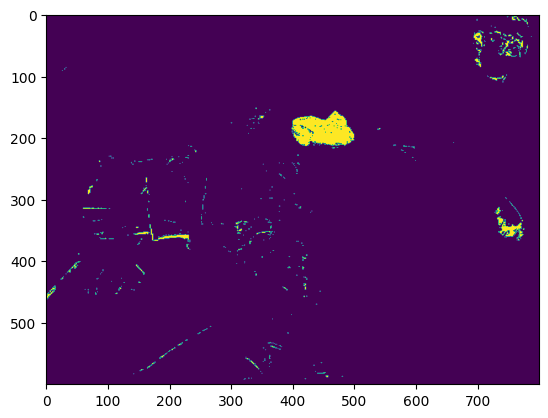

In [34]:
predict_distance('5ft.png')

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Function to find the center of the red rectangle in the image
def find_red_rectangle_center(image_path):
    # Load the image
    image = cv2.imread(image_path)
    # Convert to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Convert to HSV
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define range of red color in HSV
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    mask1 = cv2.inRange(image_hsv, lower_red, upper_red)

    lower_red = np.array([170, 120, 70])
    upper_red = np.array([180, 255, 255])
    mask2 = cv2.inRange(image_hsv, lower_red, upper_red)

    # Combine the masks
    mask = mask1 + mask2

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour and its center
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        M = cv2.moments(largest_contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0
        return cX, cY
    else:
        return None, None

# Paths of the images
image_paths = [f'{distance}ft.png' for distance in range(2, 10)]

# Dictionary to hold the data
data = {"distance": [], "x": [], "y": []}

# Process each image and gather data
for distance, image_path in enumerate(image_paths, start=2):
    x, y = find_red_rectangle_center(image_path)
    if x is not None and y is not None:
        data["distance"].append(distance)
        data["x"].append(x)
        data["y"].append(y)

data


{'distance': [2, 3, 4, 5, 6, 7, 8, 9],
 'x': [623, 551, 499, 486, 464, 456, 444, 441],
 'y': [350, 254, 204, 174, 154, 139, 127, 118]}

In [ ]:
from sklearn.linear_model import LinearRegression

# Convert the lists to numpy arrays for sklearn
distances = np.array(data['distance']).reshape(-1, 1)
x_coordinates = np.array(data['x'])
y_coordinates = np.array(data['y'])

# Create linear regression objects
reg_x = LinearRegression()
reg_y = LinearRegression()

# Train the models
reg_x.fit(distances, x_coordinates)
reg_y.fit(distances, y_coordinates)

# Get the coefficients and intercepts for the equations
x_slope = reg_x.coef_[0]
x_intercept = reg_x.intercept_
y_slope = reg_y.coef_[0]
y_intercept = reg_y.intercept_

# Create the equations as strings for easy interpretation
equation_x = f'y = {x_slope:.2f}x + {x_intercept:.2f}'
equation_y = f'y = {y_slope:.2f}x + {y_intercept:.2f}'

equation_x, equation_y, reg_x.score(distances, x_coordinates), reg_y.score(distances, y_coordinates)


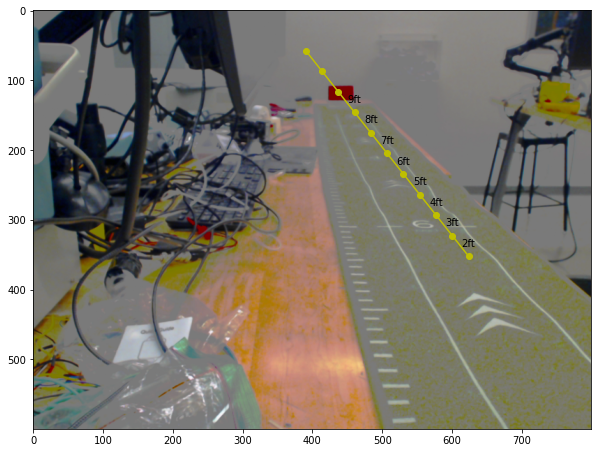

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Data points
distances = [2, 3, 4, 5, 6, 7, 8, 9]
x_coordinates = [623, 551, 499, 486, 464, 456, 444, 441]
y_coordinates = [350, 254, 204, 174, 154, 139, 127, 118]

# Create linear regression models
reg_x = LinearRegression().fit(np.array(distances).reshape(-1, 1), x_coordinates)
reg_y = LinearRegression().fit(np.array(distances).reshape(-1, 1), y_coordinates)

# Generate a range of distances from 0 to 10 for predictions
plot_distances = np.arange(0, 11).reshape(-1, 1)
predicted_x = reg_x.predict(plot_distances)
predicted_y = reg_y.predict(plot_distances)

# Load an image where you want to overlay the plot
image_path = '9ft.png'  # Replace with your image path
image = plt.imread(image_path)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(image)
ax.plot(predicted_x, predicted_y, 'yo-', label='Predicted center of rectangle')

# Annotate the plot with distance markers
for dist, (x, y) in zip(distances, zip(predicted_x, predicted_y)):
    ax.annotate(f'{dist}ft', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Display the plot
plt.show()
